In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pyplot
import seaborn as sns

In [2]:
ratings_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/teachingratings.csv'
ratings_df=pd.read_csv(ratings_url)

In [3]:
ratings_df.head()

,minority,age,gender,credits,beauty,eval,division,native,tenure,students,allstudents,prof,PrimaryLast,vismin,female,single_credit,upper_division,English_speaker,tenured_prof
0,yes,36,female,more,0.289916,4.3,upper,yes,yes,24,43,1,0,1,1,0,1,1,1
1,yes,36,female,more,0.289916,3.7,upper,yes,yes,86,125,1,0,1,1,0,1,1,1
2,yes,36,female,more,0.289916,3.6,upper,yes,yes,76,125,1,0,1,1,0,1,1,1
3,yes,36,female,more,0.289916,4.4,upper,yes,yes,77,123,1,1,1,1,0,1,1,1
4,no,59,male,more,-0.737732,4.5,upper,yes,yes,17,20,2,0,0,0,0,1,1,1


In [4]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463 entries, 0 to 462
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   minority         463 non-null    object 
 1   age              463 non-null    int64  
 2   gender           463 non-null    object 
 3   credits          463 non-null    object 
 4   beauty           463 non-null    float64
 5   eval             463 non-null    float64
 6   division         463 non-null    object 
 7   native           463 non-null    object 
 8   tenure           463 non-null    object 
 9   students         463 non-null    int64  
 10  allstudents      463 non-null    int64  
 11  prof             463 non-null    int64  
 12  PrimaryLast      463 non-null    int64  
 13  vismin           463 non-null    int64  
 14  female           463 non-null    int64  
 15  single_credit    463 non-null    int64  
 16  upper_division   463 non-null    int64  
 17  English_speaker 

In [5]:
ratings_df.shape

(463, 19)

In [6]:
ratings_df.loc[ratings_df['single_credit']==1].groupby(by='gender').agg({'eval':'count'})

,eval
gender,
female,9
male,18


<AxesSubplot:xlabel='age'>

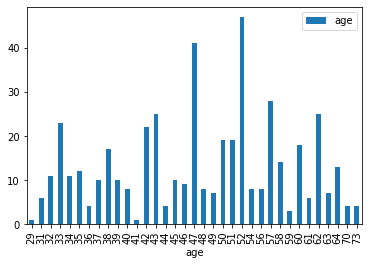

In [32]:
ratings_df.groupby(by='age').agg({'age':'count'}).plot.bar()

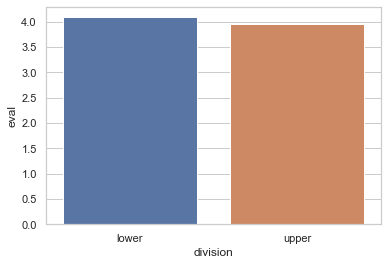

In [77]:
division_eval = ratings_df.groupby('division').agg({'eval':'mean'}).reset_index()
sns.set(style="whitegrid")
ax = sns.barplot(x="division", y="eval", data=division_eval)

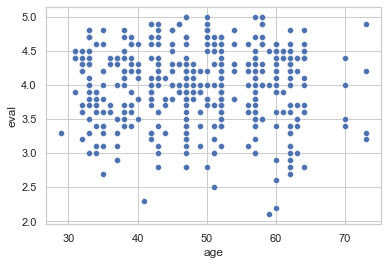

In [78]:
ax = sns.scatterplot(x='age', y='eval', data=ratings_df)

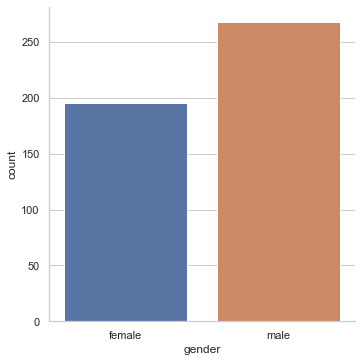

In [82]:
sns.catplot(x='gender', kind='count', data=ratings_df)

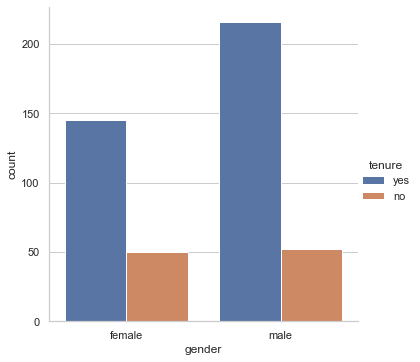

In [83]:
sns.catplot(x='gender', hue = 'tenure', kind='count', data=ratings_df)

C:\Python395\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


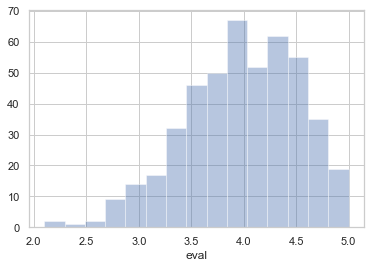

In [84]:
ax = sns.distplot(ratings_df['eval'], kde = False)

C:\Python395\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


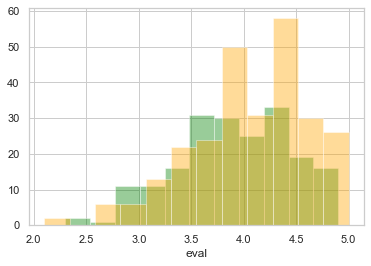

In [86]:

sns.distplot(ratings_df[ratings_df['gender'] == 'female']['eval'], color='green', kde=False) 
sns.distplot(ratings_df[ratings_df['gender'] == 'male']['eval'], color="orange", kde=False) 
pyplot.show()

In [24]:
ratings_df.loc[ratings_df['age']==31]

,minority,age,gender,credits,beauty,eval,division,native,tenure,students,allstudents,prof,PrimaryLast,vismin,female,single_credit,upper_division,English_speaker,tenured_prof
17,no,31,female,more,1.509794,4.4,upper,yes,yes,42,48,5,0,0,1,0,1,1,1
18,no,31,female,more,1.509794,3.9,upper,yes,yes,40,44,5,0,0,1,0,1,1,1
19,no,31,female,more,1.509794,4.5,upper,yes,yes,38,48,5,0,0,1,0,1,1,1
20,no,31,female,more,1.509794,4.5,upper,yes,yes,40,45,5,0,0,1,0,1,1,1
21,no,31,female,more,1.509794,4.4,upper,yes,yes,52,59,5,0,0,1,0,1,1,1
22,no,31,female,more,1.509794,4.4,upper,yes,yes,49,87,5,1,0,1,0,1,1,1


<AxesSubplot:xlabel='age'>

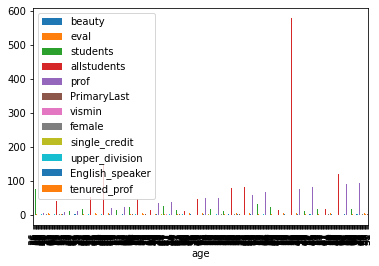

In [17]:
ratings_df.plot.bar(x='age')

<AxesSubplot:title={'center':'Courses taught by male and female instructors'}, xlabel='Gender'>

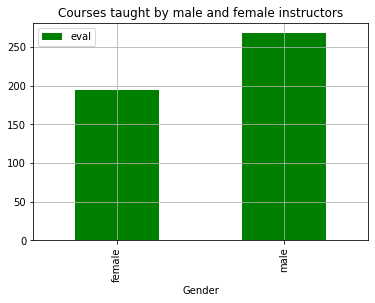

In [55]:
ratings_df.groupby(by='gender').agg({'eval':'count'}).plot.bar(grid=True,title='Courses taught by male and female instructors',xlabel='Gender',color={'eval':'green'})


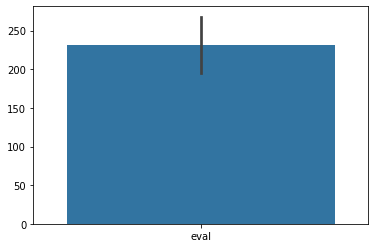

In [59]:
a1=sns.barplot(data=ratings_df.groupby(by='gender').agg({'eval':'count'}))

Text(0.5, 1.0, 'Courses taught by male and female instructors')

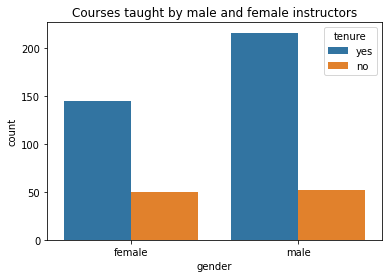

In [62]:
ax=sns.countplot(x='gender', data=ratings_df, hue='tenure')
ax.set_title('Courses taught by male and female instructors')

Text(0.5, 1.0, 'Courses taught by male and female instructors')

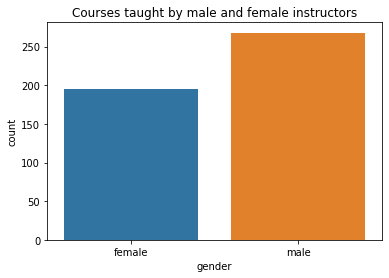

In [63]:
ax=sns.countplot(x='gender', data=ratings_df)
ax.set_title('Courses taught by male and female instructors')

<AxesSubplot:xlabel='single_credit'>

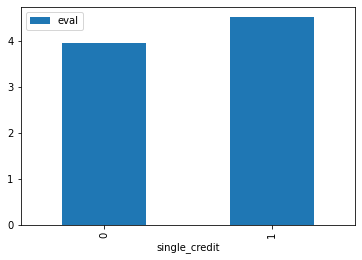

In [34]:
ratings_df.groupby(by='single_credit').agg({'eval':'mean'}).plot.bar()

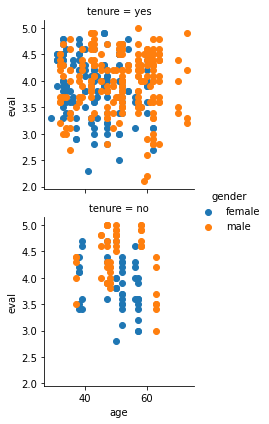

In [72]:
g=sns.FacetGrid(ratings_df,row='tenure',hue='gender')
g=(g.map(pyplot.scatter,'age','eval').add_legend())

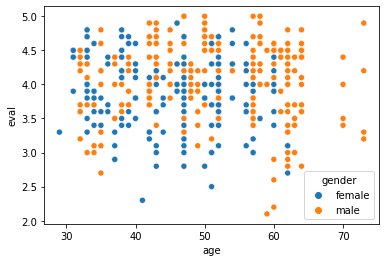

In [76]:
ax = sns.scatterplot(x='age', y='eval', hue='gender',
                     data=ratings_df)

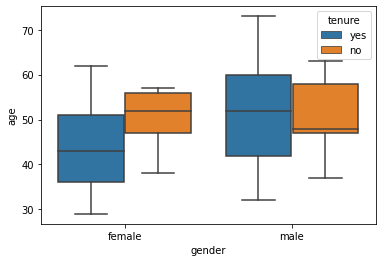

In [74]:
a3=sns.boxplot(x='gender',y='age',data=ratings_df,hue='tenure')

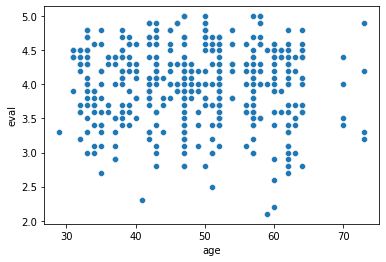

In [75]:
ax = sns.scatterplot(x='age', y='eval', data=ratings_df)

In [7]:
ratings_df.head(10)

,minority,age,gender,credits,beauty,eval,division,native,tenure,students,allstudents,prof,PrimaryLast,vismin,female,single_credit,upper_division,English_speaker,tenured_prof
0,yes,36,female,more,0.289916,4.3,upper,yes,yes,24,43,1,0,1,1,0,1,1,1
1,yes,36,female,more,0.289916,3.7,upper,yes,yes,86,125,1,0,1,1,0,1,1,1
2,yes,36,female,more,0.289916,3.6,upper,yes,yes,76,125,1,0,1,1,0,1,1,1
3,yes,36,female,more,0.289916,4.4,upper,yes,yes,77,123,1,1,1,1,0,1,1,1
4,no,59,male,more,-0.737732,4.5,upper,yes,yes,17,20,2,0,0,0,0,1,1,1
5,no,59,male,more,-0.737732,4.0,upper,yes,yes,35,40,2,0,0,0,0,1,1,1
6,no,59,male,more,-0.737732,2.1,upper,yes,yes,39,44,2,1,0,0,0,1,1,1
7,no,51,male,more,-0.571984,3.7,upper,yes,yes,55,55,3,0,0,0,0,1,1,1
8,no,51,male,more,-0.571984,3.2,upper,yes,yes,111,195,3,1,0,0,0,1,1,1
9,no,40,female,more,-0.677963,4.3,upper,yes,yes,40,46,4,0,0,1,0,1,1,1


6.271139975345787e-08
-0.0680143013596535


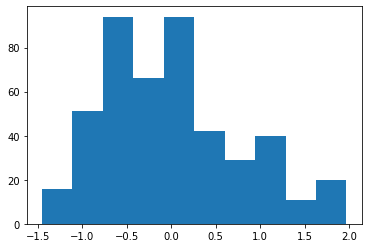

In [11]:
pyplot.hist(ratings_df['beauty'])
print(ratings_df['beauty'].mean())
print(ratings_df['beauty'].median())

In [8]:
ratings_df['age'].mean()

48.365010799136066

In [23]:
ratings_df['gender'].value_counts()

male      268
female    195
Name: gender, dtype: int64

In [8]:
ratings_df['students'].mean()

36.62419006479482

In [9]:
ratings_df['students'].median()

23.0

In [10]:
ratings_df['students'].min()

5

In [11]:
ratings_df['students'].max()

380

In [12]:
ratings_df.describe()

,age,beauty,eval,students,allstudents,prof,PrimaryLast,vismin,female,single_credit,upper_division,English_speaker,tenured_prof
count,463.000000,4.630000e+02,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000
mean,48.365011,6.271140e-08,3.998272,36.624190,55.177106,45.434125,0.203024,0.138229,0.421166,0.058315,0.660907,0.939525,0.779698
std,9.802742,7.886477e-01,0.554866,45.018481,75.072800,27.508902,0.402685,0.345513,0.494280,0.234592,0.473913,0.238623,0.414899
min,29.000000,-1.450494e+00,2.100000,5.000000,8.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,42.000000,-6.562689e-01,3.600000,15.000000,19.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,48.000000,-6.801430e-02,4.000000,23.000000,29.000000,44.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
75%,57.000000,5.456024e-01,4.400000,40.000000,60.000000,70.500000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000
max,73.000000,1.970023e+00,5.000000,380.000000,581.000000,94.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [19]:
set

set

(array([16., 51., 94., 66., 94., 42., 29., 40., 11., 20.]),
 array([-1.45049405, -1.10844234, -0.76639063, -0.42433892, -0.08228722,
         0.25976449,  0.6018162 ,  0.94386791,  1.28591962,  1.62797133,
         1.97002304]),
 <BarContainer object of 10 artists>)

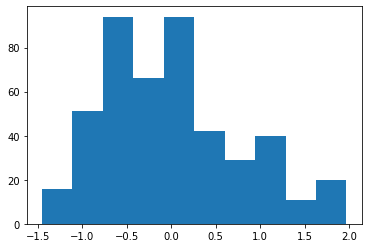

In [13]:
pyplot.hist(ratings_df['beauty'])

In [21]:
ratings_df.groupby('gender').agg({'beauty':['mean', 'std', 'var','sum']}).reset_index()

gender    beauty                              
               mean      std       var        sum
0  female  0.116109  0.81781  0.668813  22.641269
1    male -0.084482  0.75713  0.573246 -22.641240

In [42]:
tenure_count = ratings_df.loc[ratings_df['tenure']=='yes'].groupby('gender').agg({'tenure':'count'})

In [46]:
vis_min_count= ratings_df.loc[ratings_df['tenure']=='yes'].groupby('minority').agg({'tenure':'count'})

In [47]:
vis_min_count['percentage']=100*vis_min_count.tenure/vis_min_count.tenure.sum()
vis_min_count

,tenure,percentage
minority,,
no,307,85.041551
yes,54,14.958449


In [48]:
tenure_count1 = ratings_df.groupby('minority').agg({'tenure': 'count'}).reset_index()
tenure_count1['percentage'] = 100 * tenure_count1.tenure/tenure_count1.tenure.sum()
tenure_count1

,minority,tenure,percentage
0,no,399,86.177106
1,yes,64,13.822894


In [45]:
tenure_count['percentage'] = 100 * tenure_count.tenure/tenure_count.tenure.sum()
tenure_count

,tenure,percentage
gender,,
female,145,40.166205
male,216,59.833795


In [43]:
ratings_df.loc[ratings_df['tenure']=='yes'].groupby('gender').sum()

KeyboardInterrupt: 

In [40]:
ratings_df.groupby(['gender','tenure']).count()

minority  age  credits  beauty  eval  division  native  \
gender tenure                                                           
female no            50   50       50      50    50        50      50   
       yes          145  145      145     145   145       145     145   
male   no            52   52       52      52    52        52      52   
       yes          216  216      216     216   216       216     216   

               students  allstudents  prof  PrimaryLast  vismin  female  \
gender tenure                                                             
female no            50           50    50           50      50      50   
       yes          145          145   145          145     145     145   
male   no            52           52    52           52      52      52   
       yes          216          216   216          216     216     216   

               single_credit  upper_division  English_speaker  tenured_prof  
gender tenure                                                                
female no                 50              50               50            50  
       yes               145             145              145           145  
male   no                 52              52               52            52  
       yes               216             216              216           216

In [65]:

ttrratings_df.groupby('tenure').agg({'eval':['median','mean', 'std']}).reset_index())
tr

tenure   eval                    
         median      mean       std
0     no    4.2  4.133333  0.556747
1    yes    4.0  3.960111  0.549104

In [66]:
ratings_df[ratings_df['tenure'] == 'yes']['eval'].median()

4.0

In [63]:
ratings_df.loc[ratings_df['tenure']=='no']['age'].mean()

50.18627450980392

(array([41., 37., 58., 48., 75., 74., 53., 69.,  0.,  8.]),
 array([29. , 33.4, 37.8, 42.2, 46.6, 51. , 55.4, 59.8, 64.2, 68.6, 73. ]),
 <BarContainer object of 10 artists>)

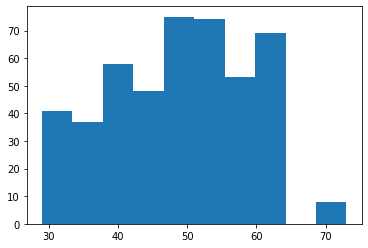

In [64]:
pyplot.hist(ratings_df['age'])

In [32]:
df2=pd.DataFrame(columns=['A'])
df3=pd.DataFrame(columns=['A'])

In [33]:
df2=df2.append({'A':1},ignore_index=True)
df2=df2.append({'A':2},ignore_index=True)
df2=df2.append({'A':5},ignore_index=True)
df2=df2.append({'A':12},ignore_index=True)
df2=df2.append({'A':4},ignore_index=True)
df2=df2.append({'A':7},ignore_index=True)
df3=df3.append({'A':6},ignore_index=True)
df3=df3.append({'A':7},ignore_index=True)
df3=df3.append({'A':10},ignore_index=True)
df3=df3.append({'A':17},ignore_index=True)
df3=df3.append({'A':9},ignore_index=True)
df3=df3.append({'A':12},ignore_index=True)

In [36]:
print(df2['A'].std())
print(df23'A'].std())
print(df3[2A'].stmean)
print(df3['3'].stdmean
pr
iprint(df2['A'].median())nt(df3['A'].std()median

3.9707262140150976
3.9707262140150976
5.166666666666667
10.166666666666666
4.5
9.5


In [31]:
df2['A'].std()

3.9707262140150976